In [1]:
from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Define the directory path where your files are located on Google Drive
directory_path = '/content/drive/MyDrive/crop_part1'

data = []

# Iterate over the files in the directory
for i in os.listdir(directory_path):
    split = i.split('_')
    age = int(split[0])
    gender = int(split[1])
    image_path = os.path.join(directory_path, i)

    # Append the extracted information to the data list
    data.append({'age': age, 'gender': gender, 'image_path': image_path})

# Create a pandas DataFrame
df = pd.DataFrame(data)


In [3]:
df.shape

(9780, 3)

In [4]:
df.head()

,age,gender,image_path
0,76,1,/content/drive/MyDrive/crop_part1/76_1_0_20170...
1,76,0,/content/drive/MyDrive/crop_part1/76_0_2_20170...
2,76,1,/content/drive/MyDrive/crop_part1/76_1_2_20170...
3,76,0,/content/drive/MyDrive/crop_part1/76_0_0_20170...
4,76,1,/content/drive/MyDrive/crop_part1/76_1_0_20170...


In [5]:
df.groupby('age').count()

,gender,image_path
age,,
1,1112,1112
2,475,475
3,284,284
4,260,260
5,180,180
...,...,...
96,16,16
99,2,2
100,2,2


In [6]:
# Count the unique values in the 'age' column
counts = df['age'].value_counts()
print(counts)

1      1112
2       475
3       284
26      279
4       260
       ... 
99        2
100       2
110       2
91        1
101       1
Name: age, Length: 99, dtype: int64


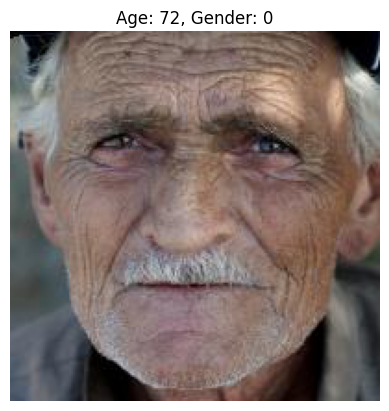

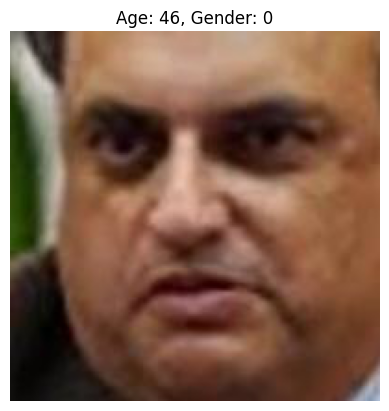

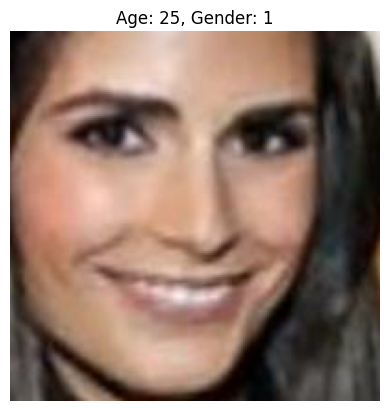

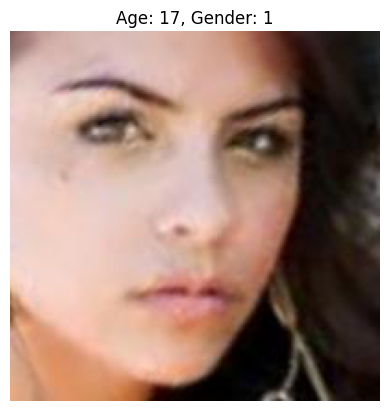

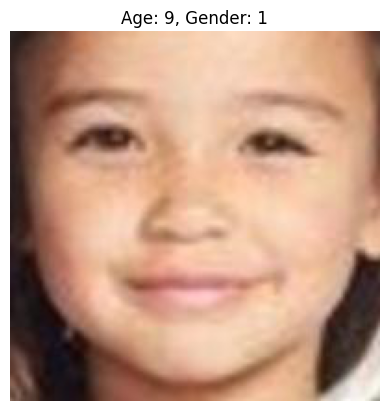

In [7]:
# Set the number of images to display
num_images = 5

# Sample a subset of the DataFrame
sample_df = df.sample(num_images)

# Iterate over the sampled DataFrame and display the images
for index, row in sample_df.iterrows():
    image_path = row['image_path']
    age = row['age']
    gender = row['gender']

    # Load and display the image
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.title(f"Age: {age}, Gender: {gender}")
    plt.axis('off')
    plt.show()


so 1 is female and 0 is male

**Plot age distribution**

<Axes: xlabel='age', ylabel='Density'>

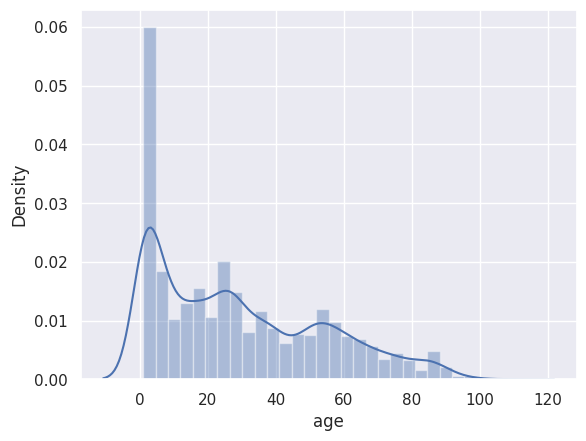

In [8]:
sns.set_theme()
sns.distplot(df['age'],kde=True, bins=30)

In [9]:
df['age'].min()

1

In [10]:
df['age'].max()

110

we have alot of pictures of ages from 0 to 4

**Plot gender distribution**

In [11]:
df = df[df['gender'] != 3]

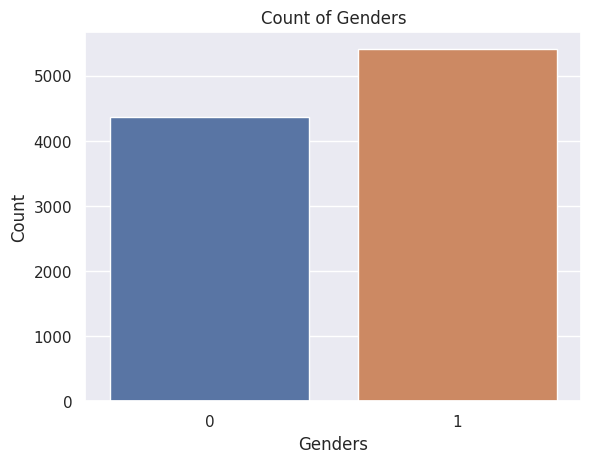

In [12]:
# Create the count plot
sns.countplot(x='gender', data=df)

# Set labels and title
plt.xlabel('Genders')
plt.ylabel('Count')
plt.title('Count of Genders')

# Display the plot
plt.show()

**Creating age buckets** to convert age problem from regression to classification problem

1. First age class 0–2 has subjects having growing teeth, hairs, generally speaking
2. For 3–9, the facial features start to grow
3. For 10–20, subjects start to look more mature
4. 21–27 age class is of mature adults. Likewise for 28–45 age class
5. 46–65 would have more loud aging features
6. And the last class, 66–112 have grey hairs, aging skin, etc.

In [13]:
import pandas as pd
# Define the age buckets and corresponding labels
age_buckets = [
    (1, 2, '1-2'),
    (3, 9, '3-9'),
    (10, 20, '10-20'),
    (21, 27, '21-27'),
    (28, 45, '28-45'),
    (46, 65, '46-65'),
    (66, 110, '66-110')
]

# Create a new column 'age_bucket' in the DataFrame
df['age_bucket'] = pd.cut(df['age'], bins=[bucket[0] - 0.5 for bucket in age_buckets] + [age_buckets[-1][1] + 0.5], labels=[bucket[2] for bucket in age_buckets])

# Print the updated DataFrame
df.head()


,age,gender,image_path,age_bucket
0,76,1,/content/drive/MyDrive/crop_part1/76_1_0_20170...,66-110
1,76,0,/content/drive/MyDrive/crop_part1/76_0_2_20170...,66-110
2,76,1,/content/drive/MyDrive/crop_part1/76_1_2_20170...,66-110
3,76,0,/content/drive/MyDrive/crop_part1/76_0_0_20170...,66-110
4,76,1,/content/drive/MyDrive/crop_part1/76_1_0_20170...,66-110


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9779 entries, 0 to 9779
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   age         9779 non-null   int64   
 1   gender      9779 non-null   int64   
 2   image_path  9779 non-null   object  
 3   age_bucket  9779 non-null   category
dtypes: category(1), int64(2), object(1)
memory usage: 315.5+ KB


In [15]:
# Convert 'gender' column to categorical data type
df['gender'] = df['gender'].astype('category')


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9779 entries, 0 to 9779
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   age         9779 non-null   int64   
 1   gender      9779 non-null   category
 2   image_path  9779 non-null   object  
 3   age_bucket  9779 non-null   category
dtypes: category(2), int64(1), object(1)
memory usage: 248.8+ KB
